# The Evolution of Homophily
* _Scribed by Zijie Chen_

## Initialization

### Module

In [4]:
from sympy import *
from sympy.abc import i, j, k, l, r, N, n, m 
import math

### Symbols

In [6]:
# mu = N*u ➡ mutation rate of preference
# nu = N*v ➡ mutation rate of phenotype
mu, nu = symbols('mu, nu', real = True, positive = True)

In [7]:
# coalesent time
tau_2, tau_3 = symbols('tau_2, tau_3', real = True, positive = True)

In [8]:
# N ➡ population size
# n ➡ the number of preference
# M ➡ the number of phenotype
N, n, M = symbols('N, n, M', real = True, positive = True)

In [9]:
# continuous preference
p, q = symbols('p, q',real = True, positive = True)

In [10]:
# payoff
a, b = symbols('a, b',real = True, positive = True)

## Prefix Calculation

### Calculate the payoff and fitness of preference $p_k$

* $G_i = G_j \quad \Longleftrightarrow \quad \delta_{ij} = 1$
* $G_i \ne G_j \quad \Longleftrightarrow \quad \delta_{ij} = 0$

The payoff matrix is $A = [\pi_{ij}]_{n \times n}$
\begin{align}
    \pi_{ij} = \delta_{ij} \cdot (\, ap_ip_j \,) + (1-\delta_{ij}) \cdot [\, b(1-p_i)(1-p_j) \,]
\end{align}

The matrix $Q = [q_{ij}]_{n \times n}$ , where $q_{ij}$ is the total number of meetings between individuals with preferences $i$ and $j$ per unit of time
\begin{align}
    q_{ij} = \delta_{ij} \cdot \left( N^2 \sum_{l=1}^M x_i^l x_j^l \right) + (1-\delta_{ij}) \cdot \left( N^2 \sum_{l=1}^M \sum_{r=1,r \ne l}^M x_i^l x_j^r \right)
\end{align}

___
#### Payoff
\begin{align}
    P_k &= \sum_j \dfrac{\pi_{kj} q_{kj}}{x_k N}
\end{align}

#### Fitness
\begin{align}
    f_k &= e^{\beta P_k}
\end{align}

### The condition of preference $p_k$ favored by natural selection

The average change of $x_k$ due to selection
\begin{align}
    \Delta x_k^{\rm{sel}} &= x_k \left( \dfrac{f_k}{\sum_j N x_j f_j}+1-\dfrac{1}{N} \right) - x_k \\
     \\
    &= \dfrac{\beta}{N} x_k \left( \sum_j \dfrac{\pi_{kj} q_{kj}}{x_k N} - \sum_i \sum_j \dfrac{x_i \pi_{ij} q_{ij}}{x_i N} \right) \bcancel{+ \mathcal{O}(\beta)}
\end{align}

Averaging the above change over all possible population states
\begin{align}
    \langle \Delta x_k^{\rm{sel}} \rangle = \dfrac{\beta}{N^2} \left( \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \right)
\end{align}

The total expected change in the mutation-selection equilibrium
\begin{align}
    \langle \Delta x_k^{\rm{tot}} \rangle = (1-u)\langle \Delta x_k^{\rm{sel}} \rangle + \dfrac{u}{N} \langle \dfrac{1}{n} - x_k \rangle
\end{align}

The stationary frequency
\begin{align}
    \langle \Delta x_k^{\rm{tot}} \rangle = 0 \quad \Longrightarrow \quad \langle x_k \rangle = \dfrac{1}{n} + \dfrac{\beta (1-u)}{Nu} \left( \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \right)
\end{align}

Natural selection favors a preference $p_k$ if
> \begin{align}
    \langle x_k \rangle > \dfrac{1}{n} \quad \Longleftrightarrow \quad \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle > 0
\end{align}

### Further Calculation

\begin{align}
    & \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \\
     \\
    =& \; \lambda_1(\pi_{kk} - \overline{\pi_{\ast \ast}}) + \lambda_2(\overline{\pi_{k \ast}} - \overline{\pi_{\ast k}}) + \lambda_3(\overline{\pi_{k \ast}} - \overline{\pi}) \\
     \\
    =& \; \left[ \lambda_1^S (\pi_{kk}^S - \overline{\pi_{\ast \ast}^S}) + \lambda_2^S (\overline{\pi_{k \ast}^S} - \overline{\pi_{\ast k}^S}) + \lambda_3^S (\overline{\pi_{k \ast}^S} - \overline{\pi^S}) \right] + \left[ \lambda_1^D (\pi_{kk}^D - \overline{\pi_{\ast \ast}^D}) + \lambda_2^D (\overline{\pi_{k \ast}^D} - \overline{\pi_{\ast k}^D}) + \lambda_3^D (\overline{\pi_{k \ast}^D} - \overline{\pi^D}) \right]
\end{align}

Here
\begin{align}
    \overline{\pi_{k \ast}} = \dfrac{\sum_j \pi_{kj}}{n} \qquad \overline{\pi_{\ast k}} = \dfrac{\sum_j \pi_{jk}}{n} \qquad \overline{\pi_{\ast \ast}} = \dfrac{\sum_j \pi_{jj}}{n} \qquad \overline{\pi} = \dfrac{\sum_i \sum_j \pi_{ij}}{n^2}
\end{align}

and
\begin{align}
    \lambda_1 &= n \left( \langle x_k q_{ii} \rangle - \langle x_k q_{ij} \rangle \right) \\
     \\
    \lambda_2 &= n \left( \langle x_k q_{jk} \rangle - \langle x_k q_{ij} \rangle \right) \\
     \\
    \lambda_3 &= n^2 \langle x_k q_{ij} \rangle
\end{align}

we write
\begin{align}
    &\sum_{l=1}^M x_i^l x_j^l \quad \longrightarrow \quad x_i^l x_j^l \\
     \\
    &\sum_{l=1}^M \sum_{r=1,r \ne l}^M x_i^l x_j^r \quad \longrightarrow \quad x_i^l x_j^r
\end{align}

then
> \begin{align}
    &\lambda_1^S = nN^2 \left( \langle x_k x_i^l x_i^l \rangle - \langle x_k x_i^l x_j^l \rangle \right) \qquad \; \lambda_2^S = nN^2 \left( \langle x_k x_k^l x_j^l \rangle - \langle x_k x_i^l x_j^l \rangle \right) \qquad \, \lambda_3^S = n^2N^2 \langle x_k x_i^l x_j^l \rangle \\
     \\
    &\lambda_1^D = nN^2 \left( \langle x_k x_i^l x_i^r \rangle - \langle x_k x_i^l x_j^r \rangle \right) \qquad \lambda_2^D = nN^2 \left( \langle x_k x_k^l x_j^r \rangle - \langle x_k x_i^l x_j^r \rangle \right) \qquad \lambda_3^D = n^2N^2 \langle x_k x_i^l x_j^r \rangle
\end{align}

### Convert discrete to continuous
Make $n \rightarrow \infty$, then
\begin{align}
    \pi_{ij} = \delta_{ij} \cdot (\, ap_ip_j \,) + (1-\delta_{ij}) \cdot [\, b(1-p_i)(1-p_j) \,] \quad &\longrightarrow \quad \delta_{ij} \cdot (\, apq \,) + (1-\delta_{ij}) \cdot [\, b(1-p)(1-q) \,] = \delta_{ij} \cdot A^S(p,q) + (1-\delta_{ij}) \cdot A^D(p,q) \\
     \\
    \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \quad &\longrightarrow \quad \mathcal{D}(p)
\end{align}
____

\begin{align}
    \mathcal{D}(p) =& \left[ \lambda_1^S \left(A^S(p,p) - \int_{0}^{1} A^S(q,q)\,dq \right) + \lambda_2^S \left(\int_{0}^{1} A^S(p,q)\,dq - \int_{0}^{1} A^S(q,p)\,dq \right) + \lambda_3^S \left(\int_{0}^{1} A^S(p,q)\,dq - \int_{0}^{1} \int_{0}^{1} A^S(p,q)\,dpdq \right) \right] \\
     \\
    &+ \left[ \lambda_1^D \left(A^D(p,p) - \int_{0}^{1} A^D(q,q)\,dq \right) + \lambda_2^D \left(\int_{0}^{1} A^D(p,q)\,dq - \int_{0}^{1} A^D(q,p)\,dq \right) + \lambda_3^D \left(\int_{0}^{1} A^D(p,q)\,dq - \int_{0}^{1} \int_{0}^{1} A^D(p,q)\,dpdq \right) \right] \\
     \\
    =& \dfrac{a(3p^2-1)}{3} \lambda_1^S + \dfrac{a(2p-1)}{4} \lambda_3^S + \dfrac{b(3p^2-6p+2)}{3} \lambda_1^D - \dfrac{b(2p-1)}{4} \lambda_3^D
\end{align}

$\mathcal{D}(p)$ is a quadratic function of $p$, denoted as
\begin{align}
    \mathcal{D}(p) = C_2(a,b,M,\mu,\nu)p^2 + C_1(a,b,M,\mu,\nu)p + C_0(a,b,M,\mu,\nu)
\end{align}

Sorted,
> \begin{align}
    C_2(a,b,M,\mu,\nu) &= a \lambda_1^S + b \lambda_1^D\\
     \\
    C_1(a,b,M,\mu,\nu) &= \dfrac{1}{2} a \lambda_3^D - b (2\lambda_1^D + \dfrac{1}{2} \lambda_3^D)\\
     \\
    C_0(a,b,M,\mu,\nu) &= -a (\dfrac{1}{3} \lambda_1^S + \dfrac{1}{4} \lambda_3^S) + b (\dfrac{2}{3} \lambda_1^D + \dfrac{1}{4} \lambda_3^D)
\end{align}

#### $A^S(\ast, \ast)$

##### \begin{align}
    A^S(p,p) - \int_{0}^{1} A^S(q,q)\,dq = \dfrac{a(3p^2-1)}{3}
\end{align}

In [18]:
factor(a*p*p - integrate(a*q*q, (q, 0, 1)))

a*(3*p**2 - 1)/3

##### \begin{align}
    \int_{0}^{1} A^S(p,q)\,dq - \int_{0}^{1} A^S(q,p)\,dq = 0
\end{align}

##### \begin{align}
    \int_{0}^{1} A^S(p,q)\,dq - \int_{0}^{1} \int_{0}^{1} A^S(p,q)\,dpdq = \dfrac{a(2p-1)}{4}
\end{align}

In [21]:
factor(integrate(a*p*q, (q, 0, 1)) - integrate(a*p*q, (p, 0, 1), (q, 0, 1)))

a*(2*p - 1)/4

#### $A^D(\ast,\ast)$

##### \begin{align}
    A^D(p,p) - \int_{0}^{1} A^D(q,q)\,dq = \dfrac{b(3p^2-6p+2)}{3}
\end{align}

In [24]:
factor(b*(1-p)*(1-p) - integrate(b*(1-q)*(1-q), (q, 0, 1)))

b*(3*p**2 - 6*p + 2)/3

##### \begin{align}
    \int_{0}^{1} A^D(p,q)\,dq - \int_{0}^{1} A^D(q,p)\,dq = 0
\end{align}

##### \begin{align}
    \int_{0}^{1} A^D(p,q)\,dq - \int_{0}^{1} \int_{0}^{1} A^D(p,q)\,dpdq = -\dfrac{b(2p-1)}{4}
\end{align}

In [27]:
factor(integrate(b*(1-p)*(1-q), (q, 0, 1)) - integrate(b*(1-p)*(1-q), (p, 0, 1), (q, 0, 1)))

-b*(2*p - 1)/4

## Symbolic Calculation

### Functions

#### The probability density of coalesent time $\tau_2$
> \begin{equation}
    T_2(\tau_2) = e^{-\tau_2}
\end{equation}

In [31]:
def T_2(tau):
    return exp(-tau)
AA = T_2(tau_2)

In [32]:
AA

exp(-tau_2)

#### The probability that two people have the same preference since their coalescent time $\tau_2$ , $\tau_3$ and $\tau_2+\tau_3$
> \begin{align}
    s_2(\tau_2) &= e^{-\mu \tau_2} + \dfrac{1 - e^{-\mu \tau_2}}{n} \\
     \\
    s_2(\tau_3) &= e^{-\mu \tau_3} + \dfrac{1 - e^{-\mu \tau_3}}{n} \\
     \\
    s_2(\tau_2+\tau_3) &= e^{-\mu (\tau_2+\tau_3)} + \dfrac{1 - e^{-\mu (\tau_2+\tau_3)}}{n}
\end{align}

In [34]:
def s_2(tau):
    return exp(-mu*tau) + (1 - exp(-mu*tau))/n
BB = s_2(tau_2)
CC = s_2(tau_3)
DD = s_2(tau_2+tau_3)

In [35]:
BB

exp(-mu*tau_2) + (1 - exp(-mu*tau_2))/n

In [36]:
CC

exp(-mu*tau_3) + (1 - exp(-mu*tau_3))/n

In [37]:
DD

exp(-mu*(tau_2 + tau_3)) + (1 - exp(-mu*(tau_2 + tau_3)))/n

#### The probability that two people have the same phenotype since their coalescent time $\tau_2$ , $\tau_3$ and $\tau_2+\tau_3$
> \begin{align}
    g_2(\tau_2) &= e^{-\nu \tau_2} + \dfrac{1 - e^{-\nu \tau_2}}{M} \\
     \\
    g_2(\tau_3) &= e^{-\nu \tau_3} + \dfrac{1 - e^{-\nu \tau_3}}{M} \\
     \\
    g_2(\tau_2+\tau_3) &= e^{-\nu (\tau_2+\tau_3)} + \dfrac{1 - e^{-\nu (\tau_2+\tau_3)}}{M}
\end{align}

In [39]:
def g_2(tau):
    return exp(-nu*tau) + (1 - exp(-nu*tau))/M
EE = g_2(tau_2)
FF = g_2(tau_3)
GG = g_2(tau_2+tau_3)

In [40]:
EE

exp(-nu*tau_2) + (1 - exp(-nu*tau_2))/M

In [41]:
FF

exp(-nu*tau_3) + (1 - exp(-nu*tau_3))/M

In [42]:
GG

exp(-nu*(tau_2 + tau_3)) + (1 - exp(-nu*(tau_2 + tau_3)))/M

#### The probability density of two steps coalesent time $\tau_2+\tau_3$
> \begin{align}
    T_3(\tau_2, \tau_3) = 3e^{-3\tau_3}e^{-\tau_2}
\end{align}

In [44]:
def T_3(tau_2, tau_3):
    return 3*exp(-3*tau_3)*exp(-tau_2)
HH = T_3(tau_2, tau_3)

In [45]:
HH

3*exp(-tau_2)*exp(-3*tau_3)

#### The probability that three people have the same phenotype since their coalescent time $\tau_2 + \tau_3$
> \begin{align}
    s_3(\tau_2,\tau_3) = \dfrac{1}{n^2} \left[ s_2(\tau_2)\left( 1+3(n-1)e^{-\mu \tau_3}+(n-1)(n-2)e^{-\frac{3}{2} \mu \tau_3} \right)+(1-s_2(\tau_2)) \left( 1+(n-3)e^{-\mu \tau_3}-(n-2)e^{-\frac{3}{2} \mu \tau_3} \right) \right]
\end{align}

In [47]:
def s_3(tau_2, tau_3):
    s_2_tau_2 = s_2(tau_2)
    return (1/(n**2))*(s_2_tau_2*(1+3*(n-1)*exp(-mu*tau_3)+(n-1)*(n-2)*exp(-3/2 * mu*tau_3)) + (1-s_2_tau_2)*(1+(n-3)*exp(-mu*tau_3)-(n-2)*exp(-3/2 * mu*tau_3)))
II = s_3(tau_2, tau_3)


In [48]:
II

((exp(-mu*tau_2) + (1 - exp(-mu*tau_2))/n)*((n - 2)*(n - 1)*exp(-1.5*mu*tau_3) + (3*n - 3)*exp(-mu*tau_3) + 1) + (1 - exp(-mu*tau_2) - (1 - exp(-mu*tau_2))/n)*((n - 3)*exp(-mu*tau_3) - (n - 2)*exp(-1.5*mu*tau_3) + 1))/n**2

#### The probability that two people have different phenotypes since their coalescent time $\tau_2$ , $\tau_3$ and $\tau_2+\tau_3$
> \begin{align}
    z_2(\tau_2) &= \dfrac{M-1}{M} (1-e^{-\nu \tau_2}) \\
     \\
    z_2(\tau_3) &= \dfrac{M-1}{M} (1-e^{-\nu \tau_3}) \\
     \\
    z_2(\tau_2+\tau_3) &= \dfrac{M-1}{M} (1-e^{-\nu (\tau_2+\tau_3)})
\end{align}

In [50]:
def z_2(tau):
    return ((M-1)/M)*(1-exp(-nu*tau))
JJ = z_2(tau_2)
KK = z_2(tau_3)
LL = z_2(tau_2+tau_3)

In [51]:
JJ

(1 - exp(-nu*tau_2))*(M - 1)/M

In [52]:
KK

(1 - exp(-nu*tau_3))*(M - 1)/M

In [53]:
LL

(1 - exp(-nu*(tau_2 + tau_3)))*(M - 1)/M

### Correlation

#### The following pair/triplet correlations associated with $\lambda_{\ast}^S$

* $\langle x_k^l x_{\ast}^l \rangle \qquad \langle x_k^l x_k^l \rangle \qquad \langle x_i^l x_j^l \rangle \qquad \langle x_k x_k^l x_{\ast}^l \rangle \qquad \langle x_k x_k^l x_k^l \rangle$

* $\langle x_k x_k^l x_j^l \rangle \qquad \langle x_k x_i^l x_j^l \rangle \qquad \langle x_k x_i^l x_i^l \rangle$

> \begin{align}
    \langle x_k^l x_{\ast}^l \rangle &= \dfrac{1}{n} \int_{0}^{+\infty} T_2(\tau_2)g_2(\tau_2) \; d\tau_2
\end{align}

In [57]:
X_kl_X__l = integrate(AA*EE, (tau_2, 0, oo))/n
X_kl_X__l = X_kl_X__l.nsimplify()
X_kl_X__l = factor(X_kl_X__l)
X_kl_X__l

(M + nu)/(M*n*(nu + 1))

> \begin{align}
    \langle x_k^l x_k^l \rangle &= \dfrac{1}{n} \int_{0}^{+\infty} T_2(\tau_2)s_2(\tau_2)g_2(\tau_2) \; d\tau_2
\end{align}

In [59]:
X_kl_X_kl = integrate(AA*BB*EE, (tau_2, 0, oo))/n
X_kl_X_kl = X_kl_X_kl.nsimplify()
X_kl_X_kl = factor(X_kl_X_kl)
X_kl_X_kl

(M*mu**2 + M*mu*n*nu + M*mu*n + M*mu + M*n*nu + M*n + mu**2*nu + mu*nu**2 + 2*mu*nu + n*nu**2 + n*nu)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1))

> \begin{align}
    \langle x_i^l x_j^l \rangle = \dfrac{1}{n-1} \left( \langle x_i^l x_{\ast}^l \rangle - \langle x_i^l x_i^l \rangle \right)
\end{align}

In [61]:
X_il_X_jl = (1/(n-1))*(X_kl_X__l - X_kl_X_kl)
X_il_X_jl = X_il_X_jl.nsimplify()
X_il_X_jl = factor(X_il_X_jl)
X_il_X_jl

mu*(M*mu + M + mu*nu + nu**2 + 2*nu)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1))

> \begin{align}
    \langle x_k x_k^l x_{\ast}^l \rangle &= \dfrac{1}{3n} \int_{0}^{+\infty}\int_{0}^{+\infty} T_3(\tau_2,\tau_3)\left[ s_2(\tau_3)g_2(\tau_2+\tau_3)+s_2(\tau_2+\tau_3)g_2(\tau_3)+s_2(\tau_2+\tau_3)g_2(\tau_2+\tau_3) \right] \; d\tau_2 d\tau_3
\end{align}

In [63]:
X_k_X_kl_X__l = integrate(HH*(CC*GG+DD*FF+DD*GG), (tau_2, 0, oo), (tau_3, 0, oo))/(3*n)
X_k_X_kl_X__l = X_k_X_kl_X__l.nsimplify()
X_k_X_kl_X__l = factor(X_k_X_kl_X__l)
X_k_X_kl_X__l

(M*mu**3 + M*mu**2*n + 2*M*mu**2*nu + 4*M*mu**2 + 3*M*mu*n*nu + 4*M*mu*n + M*mu*nu**2 + 3*M*mu*nu + 3*M*mu + M*n*nu**2 + 4*M*n*nu + 3*M*n + mu**3*nu + mu**2*n*nu + 2*mu**2*nu**2 + 4*mu**2*nu + 2*mu*n*nu**2 + 3*mu*n*nu + mu*nu**3 + 4*mu*nu**2 + 4*mu*nu + n*nu**3 + 4*n*nu**2 + 3*n*nu)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3))

> \begin{align}
    \langle x_k x_k^l x_k^l \rangle &= \dfrac{1}{3n} \int_{0}^{+\infty}\int_{0}^{+\infty} T_3(\tau_2,\tau_3)s_3(\tau_2,\tau_3) \left[ g_2(\tau_3)+g_2(\tau_2+\tau_3)+g_2(\tau_2+\tau_3) \right] d\tau_2 d\tau_3
\end{align}

In [65]:
X_k_X_kl_X_kl = integrate(HH*II*(FF+GG+GG), (tau_2, 0, oo), (tau_3, 0, oo))/(3*n)
X_k_X_kl_X_kl = X_k_X_kl_X_kl.nsimplify()
X_k_X_kl_X_kl = factor(X_k_X_kl_X_kl)
X_k_X_kl_X_kl

(3*M*mu**5 + 3*M*mu**4*n*nu + 9*M*mu**4*n + 5*M*mu**4*nu + 18*M*mu**4 + 6*M*mu**3*n**2*nu + 6*M*mu**3*n**2 + 5*M*mu**3*n*nu**2 + 33*M*mu**3*n*nu + 54*M*mu**3*n + 2*M*mu**3*nu**2 + 17*M*mu**3*nu + 33*M*mu**3 + 8*M*mu**2*n**2*nu**2 + 44*M*mu**2*n**2*nu + 36*M*mu**2*n**2 + 2*M*mu**2*n*nu**3 + 23*M*mu**2*n*nu**2 + 84*M*mu**2*n*nu + 99*M*mu**2*n + 4*M*mu**2*nu**2 + 14*M*mu**2*nu + 18*M*mu**2 + 2*M*mu*n**2*nu**3 + 30*M*mu*n**2*nu**2 + 94*M*mu*n**2*nu + 66*M*mu*n**2 + 4*M*mu*n*nu**3 + 26*M*mu*n*nu**2 + 60*M*mu*n*nu + 54*M*mu*n + 4*M*n**2*nu**3 + 28*M*n**2*nu**2 + 60*M*n**2*nu + 36*M*n**2 + 3*mu**5*nu + 6*mu**4*n*nu + 8*mu**4*nu**2 + 21*mu**4*nu + 19*mu**3*n*nu**2 + 45*mu**3*n*nu + 7*mu**3*nu**3 + 37*mu**3*nu**2 + 48*mu**3*nu + 8*mu**2*n**2*nu**2 + 8*mu**2*n**2*nu + 19*mu**2*n*nu**3 + 94*mu**2*n*nu**2 + 111*mu**2*n*nu + 2*mu**2*nu**4 + 16*mu**2*nu**3 + 40*mu**2*nu**2 + 34*mu**2*nu + 12*mu*n**2*nu**3 + 48*mu*n**2*nu**2 + 36*mu*n**2*nu + 6*mu*n*nu**4 + 44*mu*n*nu**3 + 106*mu*n*nu**2 + 84*mu*n*nu

> \begin{align}
    \langle x_k x_k^l x_j^l \rangle = \dfrac{1}{n-1} \left( \langle x_k x_k^l x_{\ast}^l \rangle - \langle x_k x_k^l x_k^l \rangle \right)
\end{align}

In [67]:
X_k_X_kl_X_jl = (1/(n-1))*(X_k_X_kl_X__l - X_k_X_kl_X_kl)
X_k_X_kl_X_jl = X_k_X_kl_X_jl.nsimplify()
X_k_X_kl_X_jl = factor(X_k_X_kl_X_jl)
X_k_X_kl_X_jl

mu*(3*M*mu**4 + 3*M*mu**3*n + 5*M*mu**3*nu + 18*M*mu**3 + 5*M*mu**2*n*nu + 18*M*mu**2*n + 2*M*mu**2*nu**2 + 17*M*mu**2*nu + 33*M*mu**2 + M*mu*n*nu**2 + 16*M*mu*n*nu + 33*M*mu*n + 4*M*mu*nu**2 + 14*M*mu*nu + 18*M*mu + 2*M*n*nu**2 + 12*M*n*nu + 18*M*n + 3*mu**4*nu + 3*mu**3*n*nu + 8*mu**3*nu**2 + 21*mu**3*nu + 8*mu**2*n*nu**2 + 21*mu**2*n*nu + 7*mu**2*nu**3 + 37*mu**2*nu**2 + 48*mu**2*nu + 7*mu*n*nu**3 + 38*mu*n*nu**2 + 49*mu*n*nu + 2*mu*nu**4 + 16*mu*nu**3 + 40*mu*nu**2 + 34*mu*nu + 2*n*nu**4 + 16*n*nu**3 + 42*n*nu**2 + 36*n*nu)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

> \begin{align}
    \langle x_k x_i^l x_j^l \rangle = \dfrac{1}{n-2} \left( \langle x_i^l x_j^l \rangle - 2 \langle x_k x_k^l x_j^l \rangle \right)
\end{align}

In [69]:
X_k_X_il_X_jl = (1/(n-2))*(X_il_X_jl - 2*X_k_X_kl_X_jl)
X_k_X_il_X_jl = X_k_X_il_X_jl.nsimplify()
X_k_X_il_X_jl = factor(X_k_X_il_X_jl)
X_k_X_il_X_jl

mu**2*(3*M*mu**3 + 5*M*mu**2*nu + 18*M*mu**2 + 2*M*mu*nu**2 + 17*M*mu*nu + 33*M*mu + 4*M*nu**2 + 14*M*nu + 18*M + 3*mu**3*nu + 8*mu**2*nu**2 + 21*mu**2*nu + 7*mu*nu**3 + 37*mu*nu**2 + 48*mu*nu + 2*nu**4 + 16*nu**3 + 40*nu**2 + 34*nu)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

> \begin{align}
    \langle x_k x_i^l x_i^l \rangle = \dfrac{1}{n-1} \left( \langle x_i^l x_i^l \rangle - \langle x_k x_k^l x_k^l \rangle \right)
\end{align}

In [71]:
X_k_X_il_X_il = (1/(n-1))*(X_kl_X_kl - X_k_X_kl_X_kl)
X_k_X_il_X_il = X_k_X_il_X_il.nsimplify()
X_k_X_il_X_il = factor(X_k_X_il_X_il)
X_k_X_il_X_il

mu*(3*M*mu**4 + 3*M*mu**3*n*nu + 3*M*mu**3*n + 5*M*mu**3*nu + 18*M*mu**3 + 5*M*mu**2*n*nu**2 + 23*M*mu**2*n*nu + 18*M*mu**2*n + 2*M*mu**2*nu**2 + 17*M*mu**2*nu + 33*M*mu**2 + 2*M*mu*n*nu**3 + 21*M*mu*n*nu**2 + 52*M*mu*n*nu + 33*M*mu*n + 4*M*mu*nu**2 + 14*M*mu*nu + 18*M*mu + 4*M*n*nu**3 + 22*M*n*nu**2 + 36*M*n*nu + 18*M*n + 3*mu**4*nu + 8*mu**3*nu**2 + 21*mu**3*nu + 3*mu**2*n*nu**2 + 3*mu**2*n*nu + 7*mu**2*nu**3 + 37*mu**2*nu**2 + 48*mu**2*nu + 5*mu*n*nu**3 + 18*mu*n*nu**2 + 13*mu*n*nu + 2*mu*nu**4 + 16*mu*nu**3 + 40*mu*nu**2 + 34*mu*nu + 2*n*nu**4 + 12*n*nu**3 + 22*n*nu**2 + 12*n*nu)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

#### The following pair/triplet correlations associated with $\lambda_{\ast}^D$

* $\langle x_i^l x_i^r \rangle \qquad \langle x_i^l x_j^r \rangle \qquad \langle x_k x_k^l x_{\ast}^r \rangle \qquad \langle x_k x_k^l x_k^r \rangle$

* $\langle x_k x_k^l x_j^r \rangle \qquad \langle x_k x_i^l x_j^r \rangle \qquad \langle x_k x_i^l x_i^r \rangle$

> \begin{align}
    \langle x_i^l x_i^r \rangle = \dfrac{1}{n} \int_{0}^{+\infty} T_2(\tau_2)s_2(\tau_2)z_2(\tau_2) \; d\tau_2
\end{align}

In [74]:
X_il_X_ir = integrate(AA*BB*JJ, (tau_2, 0, oo))/n
X_il_X_ir = X_il_X_ir.nsimplify()
X_il_X_ir = factor(X_il_X_ir)
X_il_X_ir

nu*(M - 1)*(mu**2 + mu*nu + 2*mu + n*nu + n)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1))

> \begin{align}
    \langle x_i^l x_j^r \rangle = \dfrac{1}{n(n-1)} \int_{0}^{+\infty} T_2(\tau_2)(1-s_2(\tau_2))z_2(\tau_2) \; d\tau_2
\end{align}

In [76]:
X_il_X_jr = integrate(AA*(1-BB)*JJ, (tau_2, 0, oo))/(n*(n-1))
X_il_X_jr = X_il_X_jr.nsimplify()
X_il_X_jr = factor(X_il_X_jr)
X_il_X_jr

mu*nu*(M - 1)*(mu + nu + 2)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1))

> \begin{align}
    \langle x_k x_k^l x_{\ast}^r \rangle = \dfrac{1}{3n} \int_{0}^{+\infty}\int_{0}^{+\infty} T_3(\tau_2,\tau_3)\left[ s_2(\tau_3)z_2(\tau_2+\tau_3)+s_2(\tau_2+\tau_3)z_2(\tau_3)+s_2(\tau_2+\tau_3)z_2(\tau_2+\tau_3) \right] \; d\tau_2 d\tau_3
\end{align}

In [78]:
X_k_X_kl_X__r = integrate(HH*(CC*LL+DD*KK+DD*LL), (tau_2, 0, oo), (tau_3, 0, oo))/(3*n)
X_k_X_kl_X__r = X_k_X_kl_X__r.nsimplify()
X_k_X_kl_X__r = factor(X_k_X_kl_X__r)
X_k_X_kl_X__r

nu*(M - 1)*(mu**3 + mu**2*n + 2*mu**2*nu + 4*mu**2 + 2*mu*n*nu + 3*mu*n + mu*nu**2 + 4*mu*nu + 4*mu + n*nu**2 + 4*n*nu + 3*n)/(M*n**2*(mu + 1)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3))

> \begin{align}
    \langle x_k x_k^l x_k^r \rangle = \dfrac{1}{3n} \int_{0}^{+\infty}\int_{0}^{+\infty} T_3(\tau_2,\tau_3)s_3(\tau_2,\tau_3)\left[z_2(\tau_3)+z_2(\tau_2+\tau_3)+z_2(\tau_2+\tau_3) \right] \; d\tau_2 d\tau_3
\end{align}

In [80]:
X_k_X_kl_X_kr = integrate(HH*II*(KK+LL+LL), (tau_2, 0, oo), (tau_3, 0, oo))/(3*n)
X_k_X_kl_X_kr = X_k_X_kl_X_kr.nsimplify()
X_k_X_kl_X_kr = factor(X_k_X_kl_X_kr)
X_k_X_kl_X_kr

nu*(M - 1)*(3*mu**5 + 6*mu**4*n + 8*mu**4*nu + 21*mu**4 + 19*mu**3*n*nu + 45*mu**3*n + 7*mu**3*nu**2 + 37*mu**3*nu + 48*mu**3 + 8*mu**2*n**2*nu + 8*mu**2*n**2 + 19*mu**2*n*nu**2 + 94*mu**2*n*nu + 111*mu**2*n + 2*mu**2*nu**3 + 16*mu**2*nu**2 + 40*mu**2*nu + 34*mu**2 + 12*mu*n**2*nu**2 + 48*mu*n**2*nu + 36*mu*n**2 + 6*mu*n*nu**3 + 44*mu*n*nu**2 + 106*mu*n*nu + 84*mu*n + 4*n**2*nu**3 + 28*n**2*nu**2 + 60*n**2*nu + 36*n**2)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

> \begin{align}
    \langle x_k x_k^l x_j^r \rangle = \dfrac{1}{n-1} \left( \langle x_k x_k^l x_{\ast}^r \rangle - \langle x_k x_k^l x_k^r \rangle \right)
\end{align}

In [82]:
X_k_X_kl_X_jr = (1/(n-1))*(X_k_X_kl_X__r - X_k_X_kl_X_kr)
X_k_X_kl_X_jr = X_k_X_kl_X_jr.nsimplify()
X_k_X_kl_X_jr = factor(X_k_X_kl_X_jr)
X_k_X_kl_X_jr

mu*nu*(M - 1)*(3*mu**4 + 3*mu**3*n + 8*mu**3*nu + 21*mu**3 + 8*mu**2*n*nu + 21*mu**2*n + 7*mu**2*nu**2 + 37*mu**2*nu + 48*mu**2 + 7*mu*n*nu**2 + 38*mu*n*nu + 49*mu*n + 2*mu*nu**3 + 16*mu*nu**2 + 40*mu*nu + 34*mu + 2*n*nu**3 + 16*n*nu**2 + 42*n*nu + 36*n)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

> \begin{align}
    \langle x_k x_i^l x_j^r \rangle = \dfrac{1}{n-2} \left( \langle x_i^l x_j^r \rangle - 2\langle x_k x_k^l x_j^r \rangle \right)
\end{align}

In [84]:
X_k_X_il_X_jr = (1/(n-2))*(X_il_X_jr - 2*X_k_X_kl_X_jr)
X_k_X_il_X_jr = X_k_X_il_X_jr.nsimplify()
X_k_X_il_X_jr = factor(X_k_X_il_X_jr)
X_k_X_il_X_jr

mu**2*nu*(M - 1)*(3*mu**3 + 8*mu**2*nu + 21*mu**2 + 7*mu*nu**2 + 37*mu*nu + 48*mu + 2*nu**3 + 16*nu**2 + 40*nu + 34)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

> \begin{align}
    \langle x_k x_i^l x_i^r \rangle = \dfrac{1}{n-1} \left( \langle x_i^l x_i^r \rangle - \langle x_k x_k^l x_k^r \rangle \right)
\end{align}

In [86]:
X_k_X_il_X_ir = (1/(n-1))*(X_il_X_ir - X_k_X_kl_X_kr)
X_k_X_il_X_ir = X_k_X_il_X_ir.nsimplify()
X_k_X_il_X_ir = factor(X_k_X_il_X_ir)
X_k_X_il_X_ir

mu*nu*(M - 1)*(3*mu**4 + 8*mu**3*nu + 21*mu**3 + 3*mu**2*n*nu + 3*mu**2*n + 7*mu**2*nu**2 + 37*mu**2*nu + 48*mu**2 + 5*mu*n*nu**2 + 18*mu*n*nu + 13*mu*n + 2*mu*nu**3 + 16*mu*nu**2 + 40*mu*nu + 34*mu + 2*n*nu**3 + 12*n*nu**2 + 22*n*nu + 12*n)/(M*n**3*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

#### Calculate $\lambda_{\ast}^{\ast}$

* $\lambda_{\ast}^S$
\begin{align}
    \lambda_1^S &\propto (\nu+1)(M(\mu+2)(3\mu+2\nu+3)+\nu(3\mu+2\nu+4))(\mu+\nu+3) \\
     \\
    \lambda_2^S &\propto M(2+\mu)(9+3\mu(4+\mu)+6\nu+5\mu\nu+\nu^2)+\nu(3\mu^3+2(2+\nu)((3+\nu)^2)+\mu^2(21+8\nu)+\mu(49+\nu(38+7\nu))) \\
     \\
    \lambda_3^S &\propto \mu(M(2+\mu)(9+3\mu(4+\mu)+7\nu+5\mu\nu+2\nu^2)+\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu)))
\end{align}

* $\lambda_{\ast}^D$
\begin{align}
    \lambda_1^D &\propto (M-1)\nu(1+\nu)(3+\mu+\nu)(4+3\mu+2\nu) \\
     \\
    \lambda_2^D &\propto (M-1)\nu(3\mu^3 + 2((2+\nu)(3+\nu)^2) + \mu^2(21+8\nu) + \mu(49+\nu(38+7\nu))) \\
     \\
    \lambda_3^D &\propto (M-1)\mu\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu))
\end{align}

the proportional ratio is
\begin{align}
    \chi = \dfrac{N^2\mu}{Mn(\mu+1)(\mu+2)(\nu+1)(\mu+\nu+1)(\mu+\nu+3)(3\mu+2\nu+6)}
\end{align}

In [88]:
# ratio
Chi = (N**2*mu)/(M*n*(mu+1)*(mu+2)*(nu+1)*(mu+nu+1)*(mu+nu+3)*(3*mu+2*nu+6))

##### \begin{align}
    \lambda_1^S &= nN^2 \left( \langle x_k x_i^l x_i^l \rangle - \langle x_k x_i^l x_j^l \rangle \right) \\
     \\
    &\propto (\nu+1)(M(\mu+2)(3\mu+2\nu+3)+\nu(3\mu+2\nu+4))(\mu+\nu+3)
\end{align}

In [90]:
# Calculate lambda_1^S
lambda_1S = n*N**2*(X_k_X_il_X_il - X_k_X_il_X_jl)
lambda_1S = lambda_1S.nsimplify()
lambda_1S = factor(lambda_1S)
lambda_1S

N**2*mu*(3*M*mu**2 + 2*M*mu*nu + 9*M*mu + 4*M*nu + 6*M + 3*mu*nu + 2*nu**2 + 4*nu)/(M*n*(mu + 1)*(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6))

In [91]:
# organize
lambda_1S_propto = factor(lambda_1S/Chi)
lambda_1S_collect = collect(lambda_1S_propto, M)
lambda_1S_collect = M*factor(diff(lambda_1S_collect, M))+factor(lambda_1S_collect.subs(M, 0))
lambda_1S_final = collect(lambda_1S_collect, (nu+1)*(mu+nu+3))
lambda_1S_final

(nu + 1)*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4))*(mu + nu + 3)

In [92]:
# equation (50)
(nu+1)*(M*(mu+2)*(3*mu+2*nu+3)+nu*(3*mu+2*nu+4))*(mu+nu+3)

(nu + 1)*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4))*(mu + nu + 3)

##### \begin{align}
    \lambda_2^S &= nN^2 \left( \langle x_k x_k^l x_j^l \rangle - \langle x_k x_i^l x_j^l \rangle \right) \\
     \\
    &\propto M(2+\mu)(9+3\mu(4+\mu)+6\nu+5\mu\nu+\nu^2)+\nu(3\mu^3+2(2+\nu)((3+\nu)^2)+\mu^2(21+8\nu)+\mu(49+\nu(38+7\nu)))
\end{align}

In [94]:
# Calculate lambda_2^S
lambda_2S = n*N**2*(X_k_X_kl_X_jl - X_k_X_il_X_jl)
lambda_2S = lambda_2S.nsimplify()
lambda_2S = factor(lambda_2S)
lambda_2S

N**2*mu*(3*M*mu**3 + 5*M*mu**2*nu + 18*M*mu**2 + M*mu*nu**2 + 16*M*mu*nu + 33*M*mu + 2*M*nu**2 + 12*M*nu + 18*M + 3*mu**3*nu + 8*mu**2*nu**2 + 21*mu**2*nu + 7*mu*nu**3 + 38*mu*nu**2 + 49*mu*nu + 2*nu**4 + 16*nu**3 + 42*nu**2 + 36*nu)/(M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [95]:
# organize
lambda_2S_propto = factor(lambda_2S/Chi)
lambda_2S_collect = collect(lambda_2S_propto, M)
lambda_2S_final = M*factor(diff(lambda_2S_collect, M)) + collect(factor(lambda_2S_collect.subs(M, 0)), mu)
lambda_2S_final

M*(mu + 2)*(3*mu**2 + 5*mu*nu + 12*mu + nu**2 + 6*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 38*nu + 49) + 2*nu**3 + 16*nu**2 + 42*nu + 36)

In [96]:
# equation (51)
M*(2+mu)*(9+3*mu*(4+mu)+6*nu+5*mu*nu+nu**2)+nu*(3*mu**3+2*(2+nu)*((3+nu)**2)+mu**2*(21+8*nu)+mu*(49+nu*(38+7*nu)))

M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + nu**2 + 6*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu*(7*nu + 38) + 49) + (nu + 3)**2*(2*nu + 4))

In [97]:
# verification
factor(lambda_2S_final/(factor(M*(2+mu)*(9+3*mu*(4+mu)+6*nu+5*mu*nu+nu**2)+nu*(3*mu**3+2*(2+nu)*((3+nu)**2)+mu**2*(21+8*nu)+mu*(49+nu*(38+7*nu))))))

1

##### \begin{align}
    \lambda_3^S &= n^2N^2 \langle x_k x_i^l x_j^l \rangle \\
     \\
    &\propto \mu(M(2+\mu)(9+3\mu(4+\mu)+7\nu+5\mu\nu+2\nu^2)+\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu)))
\end{align}

In [99]:
# Calculate lambda_3^S
lambda_3S = n**2 * N**2 * X_k_X_il_X_jl
lambda_3S = lambda_3S.nsimplify()
lambda_3S = factor(lambda_3S)
lambda_3S

N**2*mu**2*(3*M*mu**3 + 5*M*mu**2*nu + 18*M*mu**2 + 2*M*mu*nu**2 + 17*M*mu*nu + 33*M*mu + 4*M*nu**2 + 14*M*nu + 18*M + 3*mu**3*nu + 8*mu**2*nu**2 + 21*mu**2*nu + 7*mu*nu**3 + 37*mu*nu**2 + 48*mu*nu + 2*nu**4 + 16*nu**3 + 40*nu**2 + 34*nu)/(M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [100]:
# organize
lambda_3S_propto = factor(lambda_3S/Chi)
lambda_3S_collect = collect(lambda_3S_propto, M)
lambda_3S_final = M*factor(diff(lambda_3S_collect, M)) + collect(factor(lambda_3S_collect.subs(M, 0)), mu)
lambda_3S_final = collect(lambda_3S_final, mu)
lambda_3S_final

mu*(M*(mu + 2)*(3*mu**2 + mu*(5*nu + 12) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 37*nu + 48) + 2*nu**3 + 16*nu**2 + 40*nu + 34))

In [101]:
factor(7*nu**2 + 37*nu + 48)

(nu + 3)*(7*nu + 16)

In [102]:
# equation (52)
mu*(M*(2+mu)*(9+3*mu*(4+mu)+7*nu+5*mu*nu+2*nu**2)+nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu)))

mu*(M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34))

In [103]:
# verification
factor(lambda_3S_final/(factor(mu*(M*(2+mu)*(9+3*mu*(4+mu)+7*nu+5*mu*nu+2*nu**2)+nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu))))))

1

##### \begin{align}
    \lambda_1^D &= nN^2 \left( \langle x_k x_i^l x_i^r \rangle - \langle x_k x_i^l x_j^r \rangle \right) \\
     \\
    &\propto (M-1)\nu(1+\nu)(3+\mu+\nu)(4+3\mu+2\nu)
\end{align}

In [105]:
# calculate lambda_1^D
lambda_1D = n*N**2*(X_k_X_il_X_ir - X_k_X_il_X_jr)
lambda_1D = lambda_1D.nsimplify()
lambda_1D = factor(lambda_1D)
lambda_1D

N**2*mu*nu*(M - 1)*(3*mu + 2*nu + 4)/(M*n*(mu + 1)*(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6))

In [106]:
# organize
lambda_1D_propto = factor(lambda_1D/Chi)
lambda_1D_collect = collect(lambda_1D_propto, M)
lambda_1D_final = M*factor(diff(lambda_1D_collect, M)) + collect(factor(lambda_1D_collect.subs(M, 0)), mu)
lambda_1D_final = factor(collect(lambda_1D_final, nu))
lambda_1D_final

nu*(M - 1)*(nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 4)

In [107]:
# equation (53)
(M-1)*nu*(1+nu)*(3+mu+nu)*(4+3*mu+2*nu)

nu*(M - 1)*(nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 4)

##### \begin{align}
    \lambda_2^D &= nN^2 \left( \langle x_k x_k^l x_j^r \rangle - \langle x_k x_i^l x_j^r \rangle \right) \\
     \\
    &\propto (M-1)\nu(3\mu^3 + 2((2+\nu)(3+\nu)^2) + \mu^2(21+8\nu) + \mu(49+\nu(38+7\nu)))
\end{align}

In [109]:
# calculate lambda_2^D
lambda_2D = n*N**2*(X_k_X_kl_X_jr - X_k_X_il_X_jr)
lambda_2D = lambda_2D.nsimplify()
lambda_2D = factor(lambda_2D)
lambda_2D

N**2*mu*nu*(M - 1)*(3*mu**3 + 8*mu**2*nu + 21*mu**2 + 7*mu*nu**2 + 38*mu*nu + 49*mu + 2*nu**3 + 16*nu**2 + 42*nu + 36)/(M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [110]:
# organize
lambda_2D_propto = factor(lambda_2D/Chi)
lambda_2D_collect = collect(lambda_2D_propto, M)
lambda_2D_collect = M*factor(diff(lambda_2D_collect, M)) + collect(factor(lambda_2D_collect.subs(M, 0)), mu)
lambda_2D_collect = factor(collect(lambda_2D_collect, nu))
lambda_2D_final = collect(lambda_2D_collect, mu)
lambda_2D_final

nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 38*nu + 49) + 2*nu**3 + 16*nu**2 + 42*nu + 36)

In [111]:
# organize_
factor(2*nu**3 + 16*nu**2 + 42*nu +36)

2*(nu + 2)*(nu + 3)**2

In [112]:
# equation (54)
(M-1)*nu*(3*mu**3 + 2*((2+nu)*(3+nu)**2) + mu**2*(21+8*nu) + mu*(49+nu*(38+7*nu)))

nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu*(7*nu + 38) + 49) + 2*(nu + 2)*(nu + 3)**2)

In [113]:
# verification
factor(lambda_2D_final/(factor((M-1)*nu*(3*mu**3 + 2*((2+nu)*(3+nu)**2) + mu**2*(21+8*nu) + mu*(49+nu*(38+7*nu))))))

1

##### \begin{align}
    \lambda_3^D &= n^2N^2 \langle x_k x_i^l x_j^r \rangle \\
     \\
    &\propto (M-1)\mu\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu))
\end{align}

In [115]:
# calculate lambda_3^D
lambda_3D = n**2 * N**2 * X_k_X_il_X_jr
lambda_3D = lambda_3D.nsimplify()
lambda_3D = factor(lambda_3D)
lambda_3D

N**2*mu**2*nu*(M - 1)*(3*mu**3 + 8*mu**2*nu + 21*mu**2 + 7*mu*nu**2 + 37*mu*nu + 48*mu + 2*nu**3 + 16*nu**2 + 40*nu + 34)/(M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [116]:
# organize
lambda_3D_propto = factor(lambda_3D/Chi)
lambda_3D_collect = collect(lambda_3D_propto, M)
lambda_3D_collect = M*factor(diff(lambda_3D_collect, M)) + collect(factor(lambda_3D_collect.subs(M, 0)), mu)
lambda_3D_collect = factor(collect(lambda_3D_collect, nu))
lambda_3D_final = collect(lambda_3D_collect, mu)
lambda_3D_final

mu*nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 37*nu + 48) + 2*nu**3 + 16*nu**2 + 40*nu + 34)

In [117]:
factor(7*nu**2 + 37*nu + 48)

(nu + 3)*(7*nu + 16)

In [118]:
# equation (55)
(M-1)*mu*nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu))

mu*nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34)

In [119]:
# verification
factor(lambda_3D_final/(factor((M-1)*mu*nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu)))))

1

### Coefficients of $\mathcal{D}(p)$

##### \begin{align}
    C_2(a,b,M,\mu,\nu) &= a \lambda_1^S + b \lambda_1^D\\
     \\
    & \propto (1 + \nu)(3 + \mu + \nu)(b(−1 + M)\nu(4 + 3\mu + 2\nu) + a(M(2 + \mu)(3 + 3\mu + 2\nu) + \nu(4 + 3\mu + 2\nu)))
\end{align}

In [122]:
# calculate C_2
C_2 = a*lambda_1S + b*lambda_1D
C_2 = C_2.nsimplify()
C_2 = factor(C_2)
C_2

N**2*mu*(3*M*a*mu**2 + 2*M*a*mu*nu + 9*M*a*mu + 4*M*a*nu + 6*M*a + 3*M*b*mu*nu + 2*M*b*nu**2 + 4*M*b*nu + 3*a*mu*nu + 2*a*nu**2 + 4*a*nu - 3*b*mu*nu - 2*b*nu**2 - 4*b*nu)/(M*n*(mu + 1)*(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6))

In [123]:
# C_2 proportional to
C_2_propto = a*lambda_1S_final + b*lambda_1D_final
C_2_propto = collect(C_2, (nu+1)*(mu+nu+3))
C_2_propto

N**2*mu*(3*M*a*mu**2 + 2*M*a*mu*nu + 9*M*a*mu + 4*M*a*nu + 6*M*a + 3*M*b*mu*nu + 2*M*b*nu**2 + 4*M*b*nu + 3*a*mu*nu + 2*a*nu**2 + 4*a*nu - 3*b*mu*nu - 2*b*nu**2 - 4*b*nu)/(M*n*(mu + 1)*(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6))

In [124]:
# equation (57-1)
(1 + nu)*(3 + mu + nu)*(b*(-1 + M)*nu*(4 + 3*mu + 2*nu) + a*(M*(2 + mu)*(3 + 3*mu + 2*nu) + nu*(4 + 3*mu + 2*nu)))

(nu + 1)*(a*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4)) + b*nu*(M - 1)*(3*mu + 2*nu + 4))*(mu + nu + 3)

##### \begin{align}
    C_1(a,b,M,\mu,\nu) = \; & \dfrac{1}{2} a \lambda_3^D - b (2\lambda_1^D + \dfrac{1}{2} \lambda_3^D)\\
     \\
    \propto \; & \dfrac{1}{2} \left( -b(-1+M)\nu\left( 3\mu^4 + 8(1+\nu)(2+\nu)(3+\nu) + \mu^3(21+8\nu) + \mu^2(60+7\nu(7+\nu)) + 2\mu(43+\nu(4+\nu)(14+\nu)) \right) \right. \\
     \\
    &+a\mu \left. \left( M(2+\mu)\left( 9+3\mu(4+\mu)+7\nu+5\mu\nu+2\nu^2 \right) + \nu\left( 34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu) \right) \right) \right)
\end{align}

In [126]:
# calculate C_1
C_1 = (a*lambda_3S)/2 - b*(2*lambda_1D + (lambda_3D/2))
C_1 = C_1.nsimplify()
C_1 = factor(C_1)
C_1

N**2*mu*(3*M*a*mu**4 + 5*M*a*mu**3*nu + 18*M*a*mu**3 + 2*M*a*mu**2*nu**2 + 17*M*a*mu**2*nu + 33*M*a*mu**2 + 4*M*a*mu*nu**2 + 14*M*a*mu*nu + 18*M*a*mu - 3*M*b*mu**4*nu - 8*M*b*mu**3*nu**2 - 21*M*b*mu**3*nu - 7*M*b*mu**2*nu**3 - 49*M*b*mu**2*nu**2 - 60*M*b*mu**2*nu - 2*M*b*mu*nu**4 - 36*M*b*mu*nu**3 - 112*M*b*mu*nu**2 - 86*M*b*mu*nu - 8*M*b*nu**4 - 48*M*b*nu**3 - 88*M*b*nu**2 - 48*M*b*nu + 3*a*mu**4*nu + 8*a*mu**3*nu**2 + 21*a*mu**3*nu + 7*a*mu**2*nu**3 + 37*a*mu**2*nu**2 + 48*a*mu**2*nu + 2*a*mu*nu**4 + 16*a*mu*nu**3 + 40*a*mu*nu**2 + 34*a*mu*nu + 3*b*mu**4*nu + 8*b*mu**3*nu**2 + 21*b*mu**3*nu + 7*b*mu**2*nu**3 + 49*b*mu**2*nu**2 + 60*b*mu**2*nu + 2*b*mu*nu**4 + 36*b*mu*nu**3 + 112*b*mu*nu**2 + 86*b*mu*nu + 8*b*nu**4 + 48*b*nu**3 + 88*b*nu**2 + 48*b*nu)/(2*M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [127]:
# C_1 proportional to
C_1_propto = (a*lambda_3S_final)/2 - b*(2*lambda_1D_final + (lambda_3D_final/2))
C_1_a = C_1_propto.subs(b, 0)
C_1_b = factor(C_1_propto.subs(a, 0))
C_1_b_collect = collect(C_1_b, mu)
C_1_propto = C_1_a + C_1_b_collect
C_1_propto

a*mu*(M*(mu + 2)*(3*mu**2 + mu*(5*nu + 12) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 37*nu + 48) + 2*nu**3 + 16*nu**2 + 40*nu + 34))/2 - b*nu*(M - 1)*(3*mu**4 + mu**3*(8*nu + 21) + mu**2*(7*nu**2 + 49*nu + 60) + mu*(2*nu**3 + 36*nu**2 + 112*nu + 86) + 8*nu**3 + 48*nu**2 + 88*nu + 48)/2

In [128]:
factor(8*nu**3 + 48*nu**2 + 88*nu +48)

8*(nu + 1)*(nu + 2)*(nu + 3)

In [129]:
2*factor(nu*(nu+4)*(nu+14)+43)

2*nu**3 + 36*nu**2 + 112*nu + 86

In [130]:
# equation (57-2)
C_1_1 = -b*(-1+M)*nu*(3*mu**4+8*(1+nu)*(2+nu)*(3+nu)+mu**3*(21+8*nu)+mu**2*(60+7*nu*(7+nu))+2*mu*(43+nu*(4+nu)*(14+nu)))
C_1_2 = a*mu*(M*(2+mu)*(9+3*mu*(4+mu)+7*nu+5*mu*nu+2*nu**2)+nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu)))
(C_1_1 + C_1_2)/2

a*mu*(M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34))/2 - b*nu*(M - 1)*(3*mu**4 + mu**3*(8*nu + 21) + mu**2*(7*nu*(nu + 7) + 60) + 2*mu*(nu*(nu + 4)*(nu + 14) + 43) + (nu + 2)*(nu + 3)*(8*nu + 8))/2

In [131]:
# verification
factor(C_1_propto/(factor((C_1_1 + C_1_2)/2)))

1

##### \begin{align}
    C_0(a,b,M,\mu,\nu) = \; & -a (\dfrac{1}{3} \lambda_1^S + \dfrac{1}{4} \lambda_3^S) + b (\dfrac{2}{3} \lambda_1^D + \dfrac{1}{4} \lambda_3^D)\\
     \\
    \propto \; & \dfrac{1}{12} \left( -a\left( M(2+\mu)\left( 9\mu^3+4(1+\nu)(3+\nu)(3+2\nu)+3\mu^2(16+9\nu)+\mu(3+2\nu)(25+13\nu) \right) + \nu\left( 9\mu^4+8(1+\nu)(2+\nu)(3+\nu) \right. \right. \right. \\
     \\
    &+ \left. \left. 3\mu^2(4+\nu)(13+7\nu)+3\mu^3(21+8\nu)+2\mu(7+3\nu)(11+\nu(9+\nu)) \right) \right) \\
     \\
    &+ \left. b(-1+M)\nu\left( 9\mu^4+16(1+\nu)(2+\nu)(3+\nu)+3\mu^3(21+8\nu)+3\mu^2(56+\nu(45+7\nu))+\mu(206+2\nu(132+\nu(44+3\nu))) \right) \right)
\end{align}

In [133]:
# calculate C_0
C_0 = -a*((lambda_1S/3)+(lambda_3S/4)) + b*(((2*lambda_1D)/3)+(lambda_3D/4))
C_0 = C_0.nsimplify()
C_0 = factor(C_0)
C_0

-N**2*mu*(9*M*a*mu**4 + 27*M*a*mu**3*nu + 66*M*a*mu**3 + 26*M*a*mu**2*nu**2 + 143*M*a*mu**2*nu + 171*M*a*mu**2 + 8*M*a*mu*nu**3 + 96*M*a*mu*nu**2 + 250*M*a*mu*nu + 186*M*a*mu + 16*M*a*nu**3 + 88*M*a*nu**2 + 144*M*a*nu + 72*M*a - 9*M*b*mu**4*nu - 24*M*b*mu**3*nu**2 - 63*M*b*mu**3*nu - 21*M*b*mu**2*nu**3 - 135*M*b*mu**2*nu**2 - 168*M*b*mu**2*nu - 6*M*b*mu*nu**4 - 88*M*b*mu*nu**3 - 264*M*b*mu*nu**2 - 206*M*b*mu*nu - 16*M*b*nu**4 - 96*M*b*nu**3 - 176*M*b*nu**2 - 96*M*b*nu + 9*a*mu**4*nu + 24*a*mu**3*nu**2 + 63*a*mu**3*nu + 21*a*mu**2*nu**3 + 123*a*mu**2*nu**2 + 156*a*mu**2*nu + 6*a*mu*nu**4 + 68*a*mu*nu**3 + 192*a*mu*nu**2 + 154*a*mu*nu + 8*a*nu**4 + 48*a*nu**3 + 88*a*nu**2 + 48*a*nu + 9*b*mu**4*nu + 24*b*mu**3*nu**2 + 63*b*mu**3*nu + 21*b*mu**2*nu**3 + 135*b*mu**2*nu**2 + 168*b*mu**2*nu + 6*b*mu*nu**4 + 88*b*mu*nu**3 + 264*b*mu*nu**2 + 206*b*mu*nu + 16*b*nu**4 + 96*b*nu**3 + 176*b*nu**2 + 96*b*nu)/(12*M*n*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6))

In [134]:
# C_0 proportional to
C_0_propto = -a*((4*lambda_1S_final/12)+(3*lambda_3S_final/12)) + b*(((8*lambda_1D_final)/12)+(3*lambda_3D_final/12))

C_0_a = C_0_propto.subs(b, 0).subs(a, -1)
C_0_a_collect = 12*C_0_a
C_0_a_collect = collect(C_0_a_collect, M*(mu+2))
C_0_a_collect = collect(C_0_a_collect, nu)
C_0_a_collect = collect(C_0_a_collect, mu)

C_0_b = C_0_propto.subs(a, 0).subs(b, 1)
C_0_b_collect = 12*C_0_b
C_0_b_collect = collect(C_0_b_collect, nu*(M-1))
C_0_b_collect = collect(C_0_b_collect, mu)

C_0_propto = (-a*C_0_a_collect + b*C_0_b_collect)/12
C_0_propto

-a*(mu*(3*M*(mu + 2)*(3*mu**2 + mu*(5*nu + 12) + 2*nu**2 + 7*nu + 9) + 3*nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(7*nu**2 + 37*nu + 48) + 2*nu**3 + 16*nu**2 + 40*nu + 34)) + 4*(nu + 1)*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4))*(mu + nu + 3))/12 + b*nu*(M - 1)*(mu*(9*mu**3 + 3*mu**2*(8*nu + 21) + 3*mu*(7*nu**2 + 37*nu + 48) + 6*nu**3 + 48*nu**2 + 120*nu + 102) + 8*(nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 4))/12

In [135]:
# equation (57-3)
C_0_1 = -a*(M*(2+mu)*(9*mu**3+4*(1+nu)*(3+nu)*(3+2*nu)+3*mu**2*(16+9*nu)+mu*(3+2*nu)*(25+13*nu))+nu*(9*mu**4+8*(1+nu)*(2+nu)*(3+nu)+3*mu**2*(4+nu)*(13+7*nu)+3*mu**3*(21+8*nu)+2*mu*(7+3*nu)*(11+nu*(9+nu))))
C_0_2 = b*(-1+M)*nu*(9*mu**4+16*(1+nu)*(2+nu)*(3+nu)+3*mu**3*(21+8*nu)+3*mu**2*(56+nu*(45+7*nu))+mu*(206+2*nu*(132+nu*(44+3*nu))))
(C_0_1+C_0_2)/12

-a*(M*(mu + 2)*(9*mu**3 + 3*mu**2*(9*nu + 16) + mu*(2*nu + 3)*(13*nu + 25) + (nu + 3)*(2*nu + 3)*(4*nu + 4)) + nu*(9*mu**4 + 3*mu**3*(8*nu + 21) + 3*mu**2*(nu + 4)*(7*nu + 13) + 2*mu*(3*nu + 7)*(nu*(nu + 9) + 11) + (nu + 2)*(nu + 3)*(8*nu + 8)))/12 + b*nu*(M - 1)*(9*mu**4 + 3*mu**3*(8*nu + 21) + 3*mu**2*(nu*(7*nu + 45) + 56) + mu*(2*nu*(nu*(3*nu + 44) + 132) + 206) + (nu + 2)*(nu + 3)*(16*nu + 16))/12

In [136]:
# verification
factor(C_0_propto/(factor((C_0_1+C_0_2)/12)))

1

### Conditions for the evolution of homophily

Actually, the distribution of $p_k$ in discrete case is $\langle x_k \rangle$, so in discrete case
\begin{align}
    \langle\, p \,\rangle = \sum_{k=1}^{n} p_k \langle x_k \rangle = \sum_{k=1}^{n} \dfrac{p_k}{n} + \dfrac{\beta (1-u)}{Nu} \sum_{k=1}^{n} p_k \left( \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \right)
\end{align}

Similar to the previous calculation, make $n \rightarrow \infty$, then
\begin{align}
    \sum_{k=1}^{n} \dfrac{p_k}{n} \; \longrightarrow \; \int_{0}^{1} p \, dp = \dfrac{1}{2} \qquad \qquad \sum_{k=1}^{n} p_k \left( \sum_j \langle \pi_{kj} q_{kj} \rangle - \sum_i \sum_j \langle x_k \pi_{ij} q_{ij} \rangle \right) \; \longrightarrow \; \int_{0}^{1} p \mathcal{D}(p) \, dp
\end{align}

so, we know
\begin{align}
    \langle\, p \,\rangle = \dfrac{1}{2} + \dfrac{\beta (1-u)}{Nu} \int_{0}^{1} p \mathcal{D}(p) \, dp
\end{align}

finally, we can get the following equivalence
\begin{align}
    \langle\, p \,\rangle > \dfrac{1}{2} \qquad \Longleftrightarrow \qquad \int_{0}^{1} p \, \mathcal{D}(p) \, dp > 0
\end{align}

here
\begin{align}
    \int_{0}^{1} p \, \mathcal{D}(p) \, dp \; \propto \; & Ma\mu + 2Ma\nu + 3Ma - Mb\mu\nu - Mb\nu^2 - 2Mb\nu + a\mu\nu + a\nu^2 + 2a\nu + b\mu\nu + b\nu^2 + 2b\nu \\
     \\
    = \; & a \left[ (\mu+\nu+3)M+\nu(\mu+\nu+2) \right] - b \left[ \nu(\mu+\nu+2)(M-1) \right]
\end{align}

so
\begin{align}
    \int_{0}^{1} p \, \mathcal{D}(p) \, dp > 0 \qquad \Longleftrightarrow \qquad a > \dfrac{\nu(\mu+\nu+2)(M-1)}{\nu(\mu+\nu+2) + (\mu+\nu+3)M} \cdot b
\end{align}

In [138]:
p_Dp = factor(integrate(C_2*p**3+C_1*p**2+C_0*p, (p, 0, 1)))
p_Dp

N**2*mu*(M*a*mu + 2*M*a*nu + 3*M*a - M*b*mu*nu - M*b*nu**2 - 2*M*b*nu + a*mu*nu + a*nu**2 + 2*a*nu + b*mu*nu + b*nu**2 + 2*b*nu)/(24*M*n*(mu + 1)*(nu + 1)*(mu + nu + 3))

In [139]:
p_Dp_propto = p_Dp/(Chi*(mu+2)*(mu+nu+1)*(3*mu+2*nu+6)/24)
p_Dp_propto

M*a*mu + 2*M*a*nu + 3*M*a - M*b*mu*nu - M*b*nu**2 - 2*M*b*nu + a*mu*nu + a*nu**2 + 2*a*nu + b*mu*nu + b*nu**2 + 2*b*nu

In [140]:
p_Dp_collect = collect(collect(collect(p_Dp_propto, [a,b]), M), mu*nu+nu**2+2*nu)
p_Dp_collect

a*(M*(mu + 2*nu + 3) + mu*nu + nu**2 + 2*nu) + b*(1 - M)*(mu*nu + nu**2 + 2*nu)

## Visulazation

### Module

In [143]:
import matplotlib.pyplot as plt
import numpy as np

### FIG. S1( $b>0$ )

$\mu = 1.2$, $\nu = 1.8$, $M = 3$, $b = 1$, ($\textbf{a}$-$\textbf{k}$), respectively, $a = −3$, $−\dfrac{14}{41}$, $\dfrac{100}{683}$, $\dfrac{150}{683}$, $\dfrac{562}{1475}$, $\dfrac{24}{59}$, $\dfrac{5}{9}$, $\dfrac{700}{901}$, $\dfrac{758}{901}$, $\dfrac{220}{109}$, $5$

#### Painting Function

In [146]:
def paint_S1():
    fig, axes = plt.subplots(4, 3, figsize=(13, 10))
    
    ###################################################### axes[0, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -5273.856*x**2 - 4458.24*x + 3987.072
    y_2 = x-x
    axes[0, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 0].set_xlim(-0.1, 1.1)
    axes[0, 0].set_ylim(-5966, 4208)
    
    axes[0, 0].text(-0.075, 4150, 'a', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 0].text(0, -800, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 0].text(1, -800, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 0].scatter(0.544104503018486, 0, s = 10, color='black', zorder = 5)
    
    axes[0, 0].set_xticks([])
    axes[0, 0].set_yticks([])
    axes[0, 0].set_xticklabels([])
    axes[0, 0].set_yticklabels([])
    axes[0, 0].grid(False)
    axes[0, 0].spines['top'].set_color('none')
    axes[0, 0].spines['right'].set_color('none')
    axes[0, 0].spines['left'].set_color('none')
    axes[0, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[0, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -2455.27726829268*x + 1227.63863414634
    y_2 = x-x
    axes[0, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 1].set_xlim(-0.1, 1.1)
    axes[0, 1].set_ylim(-1298, 1298)
    
    axes[0, 1].text(-0.075, 1270, 'b', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 1].text(0, -200, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 1].text(1, -200, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 1].scatter(0.5, 0, s = 10, color='black', zorder = 5)
    
    axes[0, 1].set_xticks([])
    axes[0, 1].set_yticks([])
    axes[0, 1].set_xticklabels([])
    axes[0, 1].set_yticklabels([])
    axes[0, 1].grid(False)
    axes[0, 1].spines['top'].set_color('none')
    axes[0, 1].spines['right'].set_color('none')
    axes[0, 1].spines['left'].set_color('none')
    axes[0, 1].spines['bottom'].set_color('none')
    ########################################################################################################################

    ###################################################### axes[0, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 967.821680819912*x**2 - 2087.70736163982*x + 721.246453879941
    y_2 = x-x
    axes[0, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 2].set_xlim(-0.1, 1.1)
    axes[0, 2].set_ylim(-409, 732)
    
    axes[0, 2].text(-0.075, 725, 'c', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 2].text(0, -90, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 2].text(1, -90, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 2].scatter(0.431980525420346, 0, s = 10, color='black', zorder = 5)
    
    axes[0, 2].set_xticks([])
    axes[0, 2].set_yticks([])
    axes[0, 2].set_xticklabels([])
    axes[0, 2].set_yticklabels([])
    axes[0, 2].grid(False)
    axes[0, 2].spines['top'].set_color('none')
    axes[0, 2].spines['right'].set_color('none')
    axes[0, 2].spines['left'].set_color('none')
    axes[0, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 1113.04452122987*x**2 - 2032.55304245974*x + 645.261680819912
    y_2 = x-x
    axes[1, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 0].set_xlim(-0.1, 1.1)
    axes[1, 0].set_ylim(-293, 656)
    
    axes[1, 0].text(-0.075, 635, 'd', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 0].text(0, -75, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 0].text(1, -75, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 0].scatter(0.409123613015897, 0, s = 10, color='black', zorder = 5)
    
    axes[1, 0].set_xticks([])
    axes[1, 0].set_yticks([])
    axes[1, 0].set_xticklabels([])
    axes[1, 0].set_yticklabels([])
    axes[1, 0].grid(False)
    axes[1, 0].spines['top'].set_color('none')
    axes[1, 0].spines['right'].set_color('none')
    axes[1, 0].spines['left'].set_color('none')
    axes[1, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 1433.21608677966*x**2 - 1910.95478237288*x + 477.73869559322
    y_2 = x-x
    axes[1, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 1].set_xlim(-0.1, 1.1)
    axes[1, 1].set_ylim(-170, 488)
    
    axes[1, 1].text(-0.075, 475, 'e', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 1].text(0, -53, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 1].text(1, -53, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 1].scatter(1/3, 0, s = 10, color='black', zorder = 5)
    axes[1, 1].scatter(1, 0, s = 10, color='black', zorder = 6)
    
    axes[1, 1].set_xticks([])
    axes[1, 1].set_yticks([])
    axes[1, 1].set_xticklabels([])
    axes[1, 1].set_yticklabels([])
    axes[1, 1].grid(False)
    axes[1, 1].spines['top'].set_color('none')
    axes[1, 1].spines['right'].set_color('none')
    axes[1, 1].spines['left'].set_color('none')
    axes[1, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 1484.32271186441*x**2 - 1891.54494915254*x + 450.998237288136
    y_2 = x-x
    axes[1, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 2].set_xlim(-0.1, 1.1)
    axes[1, 2].set_ylim(-162, 461)
    
    axes[1, 2].text(-0.075, 455, 'f', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 2].text(0, -52, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 2].text(1, -52, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 2].scatter(0.317565045925659, 0, s = 10, color='black', zorder = 5)
    axes[1, 2].scatter(0.956783809638661, 0, s = 10, color='black', zorder = 6)
    
    axes[1, 2].set_xticks([])
    axes[1, 2].set_yticks([])
    axes[1, 2].set_xticklabels([])
    axes[1, 2].set_yticklabels([])
    axes[1, 2].grid(False)
    axes[1, 2].spines['top'].set_color('none')
    axes[1, 2].spines['right'].set_color('none')
    axes[1, 2].spines['left'].set_color('none')
    axes[1, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 1779.456*x**2 - 1779.456*x + 296.576
    y_2 = x-x
    axes[2, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 0].set_xlim(-0.1, 1.1)
    axes[2, 0].set_ylim(-159, 307)
    
    axes[2, 0].text(-0.075, 300, 'g', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 0].text(0, -35, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 0].text(1, -35, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 0].scatter(0.211324865405187, 0, s = 10, color='black', zorder = 5)
    axes[2, 0].scatter(0.788675134594813, 0, s = 10, color='black', zorder = 6)
    
    axes[2, 0].set_xticks([])
    axes[2, 0].set_yticks([])
    axes[2, 0].set_xticklabels([])
    axes[2, 0].set_yticklabels([])
    axes[2, 0].grid(False)
    axes[2, 0].spines['top'].set_color('none')
    axes[2, 0].spines['right'].set_color('none')
    axes[2, 0].spines['left'].set_color('none')
    axes[2, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 2218.57555604883*x**2 - 1612.68237069922*x + 66.816
    y_2 = x-x
    axes[2, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 1].set_xlim(-0.1, 1.1)
    axes[2, 1].set_ylim(-237, 683)
    
    axes[2, 1].text(-0.075, 668, 'h', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 1].text(0, -70, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 1].text(1, -70, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 1].scatter(0.0441080560981177, 0, s = 10, color='black', zorder = 5)
    axes[2, 1].scatter(0.682791853306512, 0, s = 10, color='black', zorder = 6)
    
    axes[2, 1].set_xticks([])
    axes[2, 1].set_yticks([])
    axes[2, 1].set_xticklabels([])
    axes[2, 1].set_yticklabels([])
    axes[2, 1].grid(False)
    axes[2, 1].spines['top'].set_color('none')
    axes[2, 1].spines['right'].set_color('none')
    axes[2, 1].spines['left'].set_color('none')
    axes[2, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 2346.27494783574*x**2 - 1564.18329855716*x
    y_2 = x-x
    axes[2, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 2].set_xlim(-0.1, 1.1)
    axes[2, 2].set_ylim(-271, 793)
    
    axes[2, 2].text(-0.075, 780, 'i', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 2].text(0, -84, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 2].text(1, -84, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 2].scatter(0, 0, s = 10, color='black', zorder = 5)
    axes[2, 2].scatter(2/3, 0, s = 10, color='black', zorder = 6)
    
    axes[2, 2].set_xticks([])
    axes[2, 2].set_yticks([])
    axes[2, 2].set_xticklabels([])
    axes[2, 2].set_yticklabels([])
    axes[2, 2].grid(False)
    axes[2, 2].spines['top'].set_color('none')
    axes[2, 2].spines['right'].set_color('none')
    axes[2, 2].spines['left'].set_color('none')
    axes[2, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[3, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 4681.26297247706*x**2 - 677.376*x - 1221.73299082569
    y_2 = x-x
    axes[3, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[3, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[3, 0].set_xlim(-0.1, 1.1)
    axes[3, 0].set_ylim(-1317, 2853)
    
    axes[3, 0].text(-0.075, 2820, 'j', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[3, 0].text(0, -350, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 0].text(1, -350, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 0].scatter(0.588312986961346, 0, s = 10, color='black', zorder = 5)
    
    axes[3, 0].set_xticks([])
    axes[3, 0].set_yticks([])
    axes[3, 0].set_xticklabels([])
    axes[3, 0].set_yticklabels([])
    axes[3, 0].grid(False)
    axes[3, 0].spines['top'].set_color('none')
    axes[3, 0].spines['right'].set_color('none')
    axes[3, 0].spines['left'].set_color('none')
    axes[3, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[3, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 10596.096*x**2 + 1569.024*x - 4316.544
    y_2 = x-x
    axes[3, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[3, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[3, 1].set_xlim(-0.1, 1.1)
    axes[3, 1].set_ylim(-4387, 7919)
    
    axes[3, 1].text(-0.075, 7880, 'k', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[3, 1].text(0, -975, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 1].text(1, -975, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 1].scatter(0.568498365878286, 0, s = 10, color='black', zorder = 5)
    
    axes[3, 1].set_xticks([])
    axes[3, 1].set_yticks([])
    axes[3, 1].set_xticklabels([])
    axes[3, 1].set_yticklabels([])
    axes[3, 1].grid(False)
    axes[3, 1].spines['top'].set_color('none')
    axes[3, 1].spines['right'].set_color('none')
    axes[3, 1].spines['left'].set_color('none')
    axes[3, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
        
    ###################################################### axes[3, 2] ######################################################
    axes[3, 2].set_xlim(-2, 2.7)
    axes[3, 2].set_ylim(-2, 2)
    axes[3, 2].annotate('',
                        xy=(-0.7, 1.7), xycoords='data',
                        xytext=(-0.7, -1.3), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))
    axes[3, 2].annotate('',
                        xy=(1.5, -1.3), xycoords='data',
                        xytext=(-0.7, -1.3), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))
    axes[3, 2].text(-0.85, -1.5, '0', fontsize=13, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 2].text(1.6, -1.5, 'x', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')
    axes[3, 2].text(-0.85, 1.9, 'y', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')
    axes[3, 2].grid(False)
    axes[3, 2].set_xticks([])
    axes[3, 2].set_yticks([])
    axes[3, 2].spines['right'].set_color('none')
    axes[3, 2].spines['top'].set_color('none')
    axes[3, 2].spines['left'].set_color('none')
    axes[3, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    # save the figure
    # plt.savefig('Feng2012_FIG_S1.png', format='png', dpi = 900)
    
    plt.show()

#### Figure

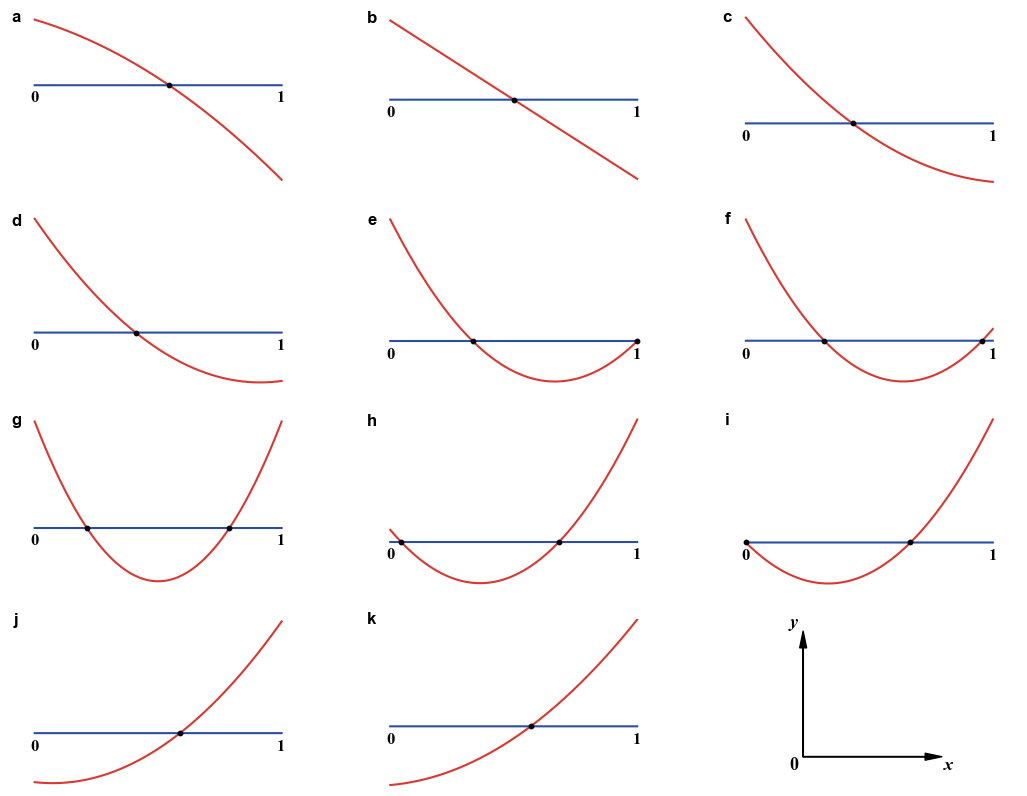

In [148]:
paint_S1()

### FIG. S2( $b<0$ )

#### Painting Function

In [151]:
def paint_S2():
    fig, axes = plt.subplots(4, 3, figsize=(13, 10))
    
    ###################################################### axes[0, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -10596.096*x**2 - 1569.024*x + 4316.544
    y_2 = x-x
    axes[0, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 0].set_xlim(-0.1, 1.1)
    axes[0, 0].set_ylim(-7959, 4387)
    
    axes[0, 0].text(-0.075, 4348, 'a', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 0].text(0, -975, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 0].text(1, -975, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 0].scatter(0.568498365878286, 0, s = 10, color='black', zorder = 5)
    
    axes[0, 0].set_xticks([])
    axes[0, 0].set_yticks([])
    axes[0, 0].set_xticklabels([])
    axes[0, 0].set_yticklabels([])
    axes[0, 0].grid(False)
    axes[0, 0].spines['top'].set_color('none')
    axes[0, 0].spines['right'].set_color('none')
    axes[0, 0].spines['left'].set_color('none')
    axes[0, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[0, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -4681.26297247706*x**2 + 677.376*x + 1221.73299082569
    y_2 = x-x
    axes[0, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 1].set_xlim(-0.1, 1.1)
    axes[0, 1].set_ylim(-2853, 1317)
    
    axes[0, 1].text(-0.075, 1284, 'b', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 1].text(0, -350, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 1].text(1, -350, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 1].scatter(0.588312986961346, 0, s = 10, color='black', zorder = 5)
    
    axes[0, 1].set_xticks([])
    axes[0, 1].set_yticks([])
    axes[0, 1].set_xticklabels([])
    axes[0, 1].set_yticklabels([])
    axes[0, 1].grid(False)
    axes[0, 1].spines['top'].set_color('none')
    axes[0, 1].spines['right'].set_color('none')
    axes[0, 1].spines['left'].set_color('none')
    axes[0, 1].spines['bottom'].set_color('none')
    ########################################################################################################################

    ###################################################### axes[0, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -2346.27494783574*x**2 + 1564.18329855716*x
    y_2 = x-x
    axes[0, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[0, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[0, 2].set_xlim(-0.1, 1.1)
    axes[0, 2].set_ylim(-793, 271)
    
    axes[0, 2].text(-0.075, 260, 'c', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[0, 2].text(0, -84, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 2].text(1, -84, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[0, 2].scatter(0, 0, s = 10, color='black', zorder = 5)
    axes[0, 2].scatter(2/3, 0, s = 10, color='black', zorder = 6)
    
    axes[0, 2].set_xticks([])
    axes[0, 2].set_yticks([])
    axes[0, 2].set_xticklabels([])
    axes[0, 2].set_yticklabels([])
    axes[0, 2].grid(False)
    axes[0, 2].spines['top'].set_color('none')
    axes[0, 2].spines['right'].set_color('none')
    axes[0, 2].spines['left'].set_color('none')
    axes[0, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -2218.57555604883*x**2 + 1612.68237069922*x - 66.816
    y_2 = x-x
    axes[1, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 0].set_xlim(-0.1, 1.1)
    axes[1, 0].set_ylim(-683, 237)
    
    axes[1, 0].text(-0.075, 222, 'd', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 0].text(0, 60, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 0].text(1, 60, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 0].scatter(0.0441080560981177, 0, s = 10, color='black', zorder = 5)
    axes[1, 0].scatter(0.682791853306512, 0, s = 10, color='black', zorder = 6)
    
    axes[1, 0].set_xticks([])
    axes[1, 0].set_yticks([])
    axes[1, 0].set_xticklabels([])
    axes[1, 0].set_yticklabels([])
    axes[1, 0].grid(False)
    axes[1, 0].spines['top'].set_color('none')
    axes[1, 0].spines['right'].set_color('none')
    axes[1, 0].spines['left'].set_color('none')
    axes[1, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -1779.456*x**2 + 1779.456*x - 296.576
    y_2 = x-x
    axes[1, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 1].set_xlim(-0.1, 1.1)
    axes[1, 1].set_ylim(-307, 159)
    
    axes[1, 1].text(-0.075, 152, 'e', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 1].text(0, -35, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 1].text(1, -35, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 1].scatter(0.211324865405187, 0, s = 10, color='black', zorder = 5)
    axes[1, 1].scatter(0.788675134594813, 0, s = 10, color='black', zorder = 6)
    
    axes[1, 1].set_xticks([])
    axes[1, 1].set_yticks([])
    axes[1, 1].set_xticklabels([])
    axes[1, 1].set_yticklabels([])
    axes[1, 1].grid(False)
    axes[1, 1].spines['top'].set_color('none')
    axes[1, 1].spines['right'].set_color('none')
    axes[1, 1].spines['left'].set_color('none')
    axes[1, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[1, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -1484.32271186441*x**2 + 1891.54494915254*x - 450.998237288136
    y_2 = x-x
    axes[1, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[1, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[1, 2].set_xlim(-0.1, 1.1)
    axes[1, 2].set_ylim(-461, 162)
    
    axes[1, 2].text(-0.075, 156, 'f', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[1, 2].text(0, 40, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 2].text(1, 40, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[1, 2].scatter(0.317565045925659, 0, s = 10, color='black', zorder = 5)
    axes[1, 2].scatter(0.956783809638661, 0, s = 10, color='black', zorder = 6)
    
    axes[1, 2].set_xticks([])
    axes[1, 2].set_yticks([])
    axes[1, 2].set_xticklabels([])
    axes[1, 2].set_yticklabels([])
    axes[1, 2].grid(False)
    axes[1, 2].spines['top'].set_color('none')
    axes[1, 2].spines['right'].set_color('none')
    axes[1, 2].spines['left'].set_color('none')
    axes[1, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -1433.21608677966*x**2 + 1910.95478237288*x - 477.73869559322
    y_2 = x-x
    axes[2, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 0].set_xlim(-0.1, 1.1)
    axes[2, 0].set_ylim(-488, 170)
    
    axes[2, 0].text(-0.075, 157, 'g', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 0].text(0, -53, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 0].text(1, -53, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 0].scatter(1/3, 0, s = 10, color='black', zorder = 5)
    axes[2, 0].scatter(1, 0, s = 10, color='black', zorder = 6)
    
    axes[2, 0].set_xticks([])
    axes[2, 0].set_yticks([])
    axes[2, 0].set_xticklabels([])
    axes[2, 0].set_yticklabels([])
    axes[2, 0].grid(False)
    axes[2, 0].spines['top'].set_color('none')
    axes[2, 0].spines['right'].set_color('none')
    axes[2, 0].spines['left'].set_color('none')
    axes[2, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -1113.04452122987*x**2 + 2032.55304245974*x - 645.261680819912
    y_2 = x-x
    axes[2, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 1].set_xlim(-0.1, 1.1)
    axes[2, 1].set_ylim(-656, 293)
    
    axes[2, 1].text(-0.075, 280, 'h', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 1].text(0, -75, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 1].text(1, -75, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 1].scatter(0.409123613015897, 0, s = 10, color='black', zorder = 5)
    
    axes[2, 1].set_xticks([])
    axes[2, 1].set_yticks([])
    axes[2, 1].set_xticklabels([])
    axes[2, 1].set_yticklabels([])
    axes[2, 1].grid(False)
    axes[2, 1].spines['top'].set_color('none')
    axes[2, 1].spines['right'].set_color('none')
    axes[2, 1].spines['left'].set_color('none')
    axes[2, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[2, 2] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = -967.821680819912*x**2 + 2087.70736163982*x - 721.246453879941
    y_2 = x-x
    axes[2, 2].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[2, 2].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[2, 2].set_xlim(-0.1, 1.1)
    axes[2, 2].set_ylim(-732, 409)
    
    axes[2, 2].text(-0.075, 402, 'i', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[2, 2].text(0, -90, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 2].text(1, -90, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[2, 2].scatter(0.431980525420346, 0, s = 10, color='black', zorder = 5)
    
    axes[2, 2].set_xticks([])
    axes[2, 2].set_yticks([])
    axes[2, 2].set_xticklabels([])
    axes[2, 2].set_yticklabels([])
    axes[2, 2].grid(False)
    axes[2, 2].spines['top'].set_color('none')
    axes[2, 2].spines['right'].set_color('none')
    axes[2, 2].spines['left'].set_color('none')
    axes[2, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[3, 0] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 2455.27726829268*x - 1227.63863414634
    y_2 = x-x
    axes[3, 0].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[3, 0].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[3, 0].set_xlim(-0.1, 1.1)
    axes[3, 0].set_ylim(-1298, 1298)
    
    axes[3, 0].text(-0.075, 1270, 'j', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[3, 0].text(0, -200, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 0].text(1, -200, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 0].scatter(0.5, 0, s = 10, color='black', zorder = 5)
    
    axes[3, 0].set_xticks([])
    axes[3, 0].set_yticks([])
    axes[3, 0].set_xticklabels([])
    axes[3, 0].set_yticklabels([])
    axes[3, 0].grid(False)
    axes[3, 0].spines['top'].set_color('none')
    axes[3, 0].spines['right'].set_color('none')
    axes[3, 0].spines['left'].set_color('none')
    axes[3, 0].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    ###################################################### axes[3, 1] ######################################################
    x = np.linspace(0, 1, 40000)
    y_1 = 5273.856*x**2 + 4458.24*x - 3987.072
    y_2 = x-x
    axes[3, 1].plot(x, y_1, color='#D93831', linewidth = 1.5)
    axes[3, 1].plot(x, y_2, color='#2A4EA3', linewidth = 1.5)
    
    axes[3, 1].set_xlim(-0.1, 1.1)
    axes[3, 1].set_ylim(-4208, 5966)
    
    axes[3, 1].text(-0.075, 5900, 'k', fontsize=12, fontname='Arial', fontweight='bold', ha='center', va='center')
    axes[3, 1].text(0, -800, '0', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 1].text(1, -800, '1', fontsize=12, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 1].scatter(0.544104503018486, 0, s = 10, color='black', zorder = 5)
    
    axes[3, 1].set_xticks([])
    axes[3, 1].set_yticks([])
    axes[3, 1].set_xticklabels([])
    axes[3, 1].set_yticklabels([])
    axes[3, 1].grid(False)
    axes[3, 1].spines['top'].set_color('none')
    axes[3, 1].spines['right'].set_color('none')
    axes[3, 1].spines['left'].set_color('none')
    axes[3, 1].spines['bottom'].set_color('none')
    ########################################################################################################################
        
    ###################################################### axes[3, 2] ######################################################
    axes[3, 2].set_xlim(-2, 2.7)
    axes[3, 2].set_ylim(-2, 2)
    axes[3, 2].annotate('',
                        xy=(-0.7, 1.7), xycoords='data',
                        xytext=(-0.7, -1.3), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))
    axes[3, 2].annotate('',
                        xy=(1.5, -1.3), xycoords='data',
                        xytext=(-0.7, -1.3), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))
    axes[3, 2].text(-0.85, -1.5, '0', fontsize=13, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
    axes[3, 2].text(1.6, -1.5, 'x', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')
    axes[3, 2].text(-0.85, 1.9, 'y', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')
    axes[3, 2].grid(False)
    axes[3, 2].set_xticks([])
    axes[3, 2].set_yticks([])
    axes[3, 2].spines['right'].set_color('none')
    axes[3, 2].spines['top'].set_color('none')
    axes[3, 2].spines['left'].set_color('none')
    axes[3, 2].spines['bottom'].set_color('none')
    ########################################################################################################################
    
    # save the figure
    # plt.savefig('Feng2012_FIG_S2.png', format='png', dpi = 900)
    
    plt.show()

#### Figure

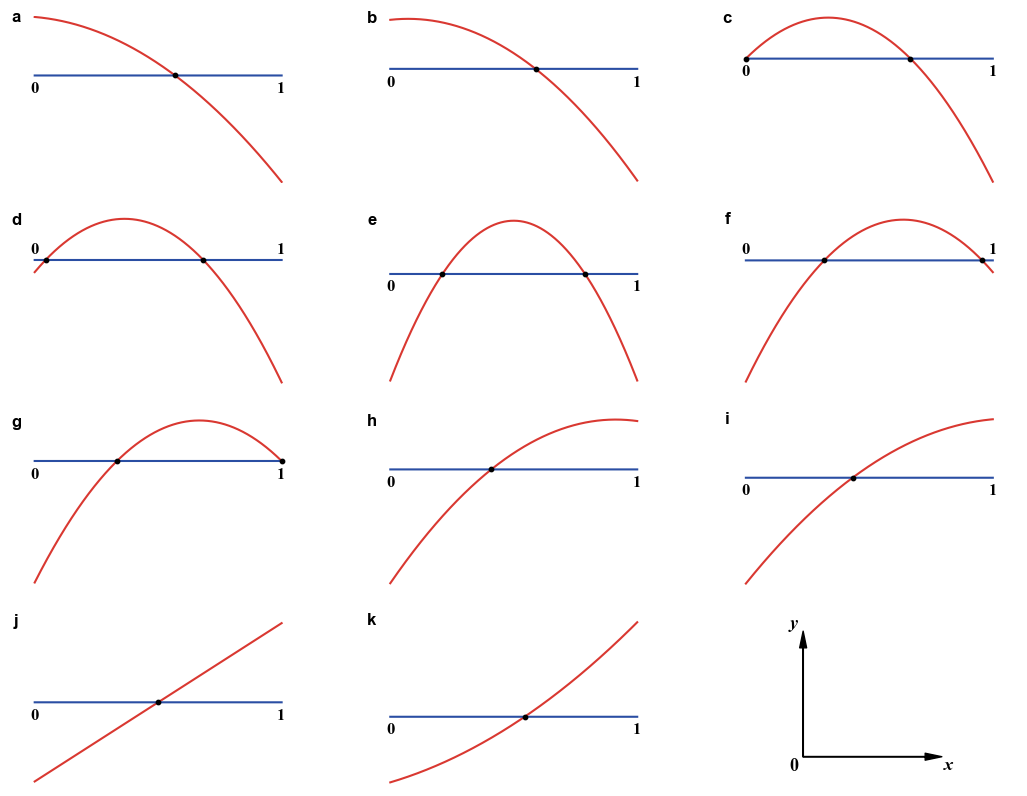

In [153]:
paint_S2()